In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

sampled_data = pd.read_csv('./data/merged_train_reduced.csv')

sampled_data.shape

(92253, 746)

In [3]:
X = sampled_data.drop(columns = ['TARGET'])
y = sampled_data['TARGET']

# X is the feature matrix and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

## Exploratory Data Analysis

### Target Distribution

In [3]:
target_count = train['TARGET'].value_counts()

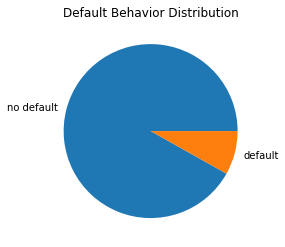

In [4]:
import matplotlib.pyplot as plt
plt.pie(target_count.values, labels=['no default', 'default'])
plt.title('Default Behavior Distribution')
plt.show()

### Multi-variate analysis

#### Target and Birthday

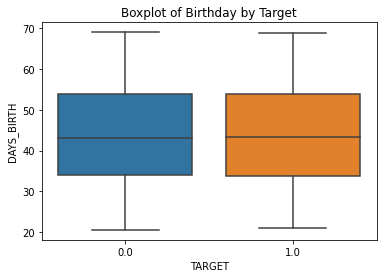

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

TARGET = train['TARGET']
DAYS_BIRTH = train['DAYS_BIRTH'] / -365
sns.boxplot(x=TARGET, y=DAYS_BIRTH)
plt.title('Boxplot of Birthday by Target')
plt.show()

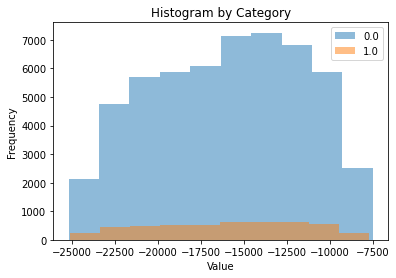

In [12]:
grouped_birthday = train.groupby('TARGET')

for name, group in grouped_birthday:
    plt.hist(group['DAYS_BIRTH'], alpha=0.5, label=name)

plt.title('Histogram by Category')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

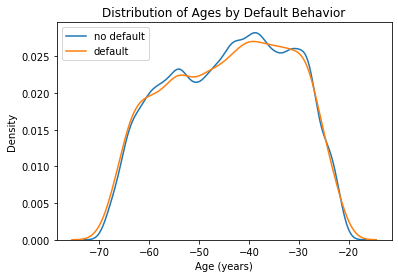

In [16]:
sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'no default')

sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'default')

plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages by Default Behavior')
plt.legend()

#### Target and EXT_SOURCE Index

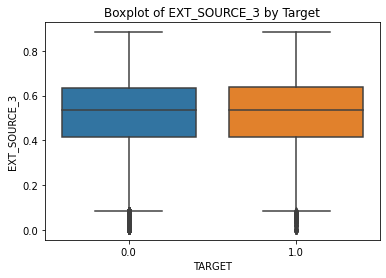

In [19]:

sns.boxplot(x='TARGET', y='EXT_SOURCE_3', data=train)
plt.title('Boxplot of EXT_SOURCE_3 by Target')
plt.show()

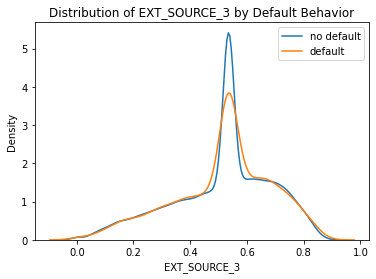

In [17]:
sns.kdeplot(train.loc[train['TARGET'] == 0, 'EXT_SOURCE_3'], label = 'no default')

sns.kdeplot(train.loc[train['TARGET'] == 1, 'EXT_SOURCE_3'], label = 'default')

plt.xlabel('EXT_SOURCE_3')
plt.ylabel('Density')
plt.title('Distribution of EXT_SOURCE_3 by Default Behavior')
plt.legend()

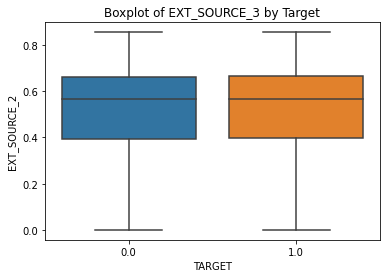

In [10]:
sns.boxplot(x='TARGET', y='EXT_SOURCE_2', data=train)
plt.title('Boxplot of EXT_SOURCE_3 by Target')
plt.show()

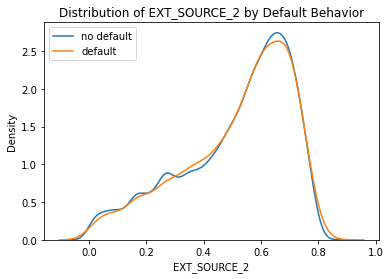

In [18]:
sns.kdeplot(train.loc[train['TARGET'] == 0, 'EXT_SOURCE_2'], label = 'no default')

sns.kdeplot(train.loc[train['TARGET'] == 1, 'EXT_SOURCE_2'], label = 'default')

plt.xlabel('EXT_SOURCE_2')
plt.ylabel('Density')
plt.title('Distribution of EXT_SOURCE_2 by Default Behavior')
plt.legend()

#### Target and average days before current application did client apply for Credit Bureau credit

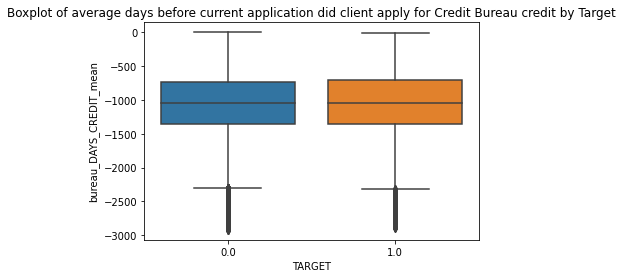

In [12]:
sns.boxplot(x='TARGET', y='bureau_DAYS_CREDIT_mean', data=train)
plt.title('Boxplot of average days before current application did client apply for Credit Bureau credit by Target')
plt.show()

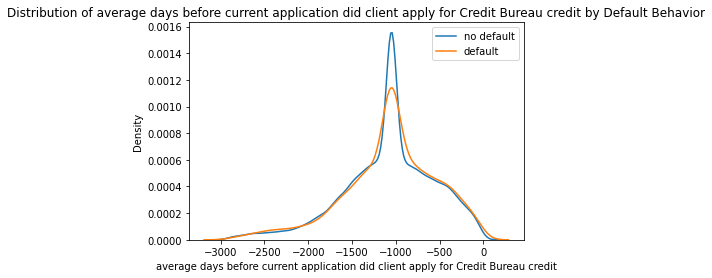

In [13]:
sns.kdeplot(train.loc[train['TARGET'] == 0, 'bureau_DAYS_CREDIT_mean'], label = 'no default')

sns.kdeplot(train.loc[train['TARGET'] == 1, 'bureau_DAYS_CREDIT_mean'], label = 'default')

plt.xlabel('average days before current application did client apply for Credit Bureau credit')
plt.ylabel('Density')
plt.title('Distribution of average days before current application did client apply for Credit Bureau credit by Default Behavior')
plt.legend()

#### Target and previous application (refused and approved)

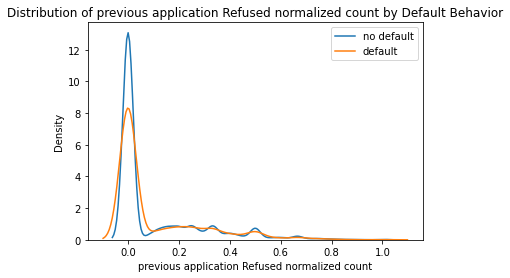

In [8]:
sns.kdeplot(train.loc[train['TARGET'] == 0, 'previous_application_NAME_CONTRACT_STATUS_Refused_count_norm'], label = 'no default')

sns.kdeplot(train.loc[train['TARGET'] == 1, 'previous_application_NAME_CONTRACT_STATUS_Refused_count_norm'], label = 'default')

plt.xlabel('previous application Refused normalized count')
plt.ylabel('Density')
plt.title('Distribution of previous application Refused normalized count by Default Behavior')
plt.legend()

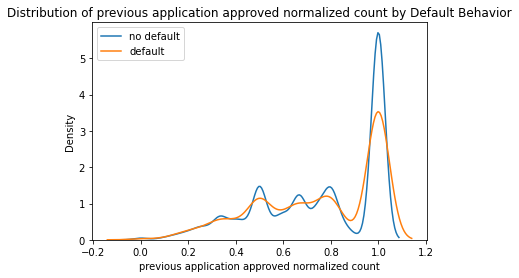

In [11]:
sns.kdeplot(train.loc[train['TARGET'] == 0, 'previous_application_NAME_CONTRACT_STATUS_Approved_count_norm'], label = 'no default')

sns.kdeplot(train.loc[train['TARGET'] == 1, 'previous_application_NAME_CONTRACT_STATUS_Approved_count_norm'], label = 'default')

plt.xlabel('previous application approved normalized count')
plt.ylabel('Density')
plt.title('Distribution of previous application approved normalized count by Default Behavior')
plt.legend()

#### Target and Status of the Credit Bureau (CB) reported credits

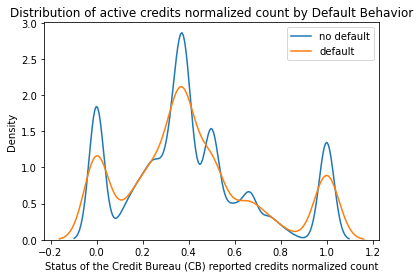

In [14]:
sns.kdeplot(train.loc[train['TARGET'] == 0, 'bureau_CREDIT_ACTIVE_Active_count_norm'], label = 'no default')

sns.kdeplot(train.loc[train['TARGET'] == 1, 'bureau_CREDIT_ACTIVE_Active_count_norm'], label = 'default')

plt.xlabel('Status of the Credit Bureau (CB) reported credits normalized count')
plt.ylabel('Density')
plt.title('Distribution of active credits normalized count by Default Behavior')
plt.legend()